      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Accuracy: 0.916
              precision    recall  f1-sc

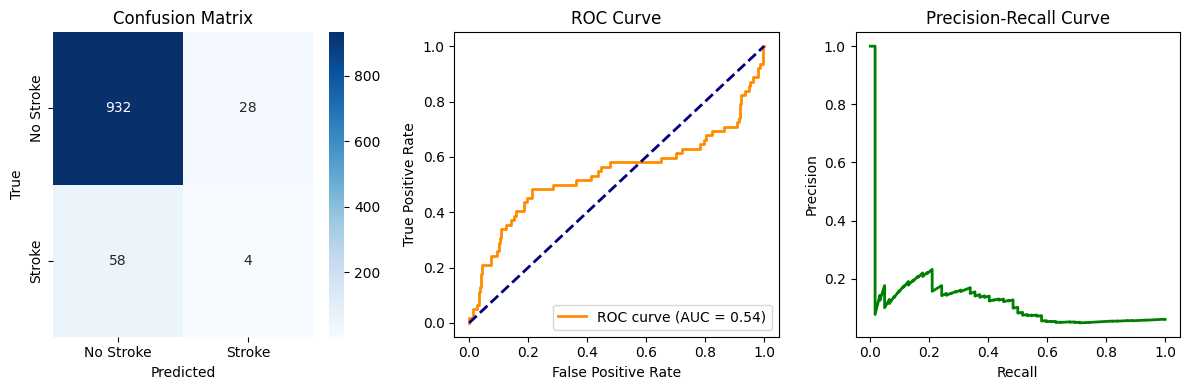

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('stroke.csv')  # Replace with your actual file path
print(data.head())

# Encode categorical variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'].astype(str))
data['smoking_status'] = le.fit_transform(data['smoking_status'].astype(str))
data['ever_married'] = le.fit_transform(data['ever_married'].astype(str))
data['work_type'] = le.fit_transform(data['work_type'].astype(str))
data['Residence_type'] = le.fit_transform(data['Residence_type'].astype(str))

# Fill missing values with column means
data = data.fillna(data.select_dtypes(include=np.number).mean())

# Feature selection
X = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = data['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Perceptron model
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')
print(classification_report(y_test, y_pred))

final_weights = perceptron.coef_
print(f'Final Weights: {final_weights}')

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# ROC Curve
plt.subplot(1, 3, 2)
fpr, tpr, thresholds = roc_curve(y_test, perceptron.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall Curve
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, perceptron.decision_function(X_test))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()
